In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/투빅스 과제/HR_Employee_Attrition.csv')

In [11]:
pd.options.display.max_columns = None
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **1. 결측치, 이상치 검토**

- 결측치

In [5]:
df.isnull().sum()
#결측치 존재하지 않음

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

이상치

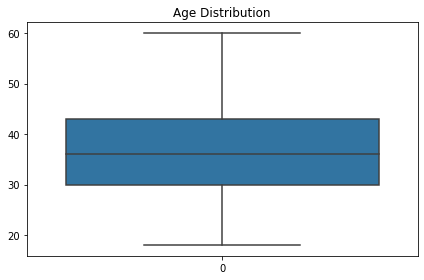

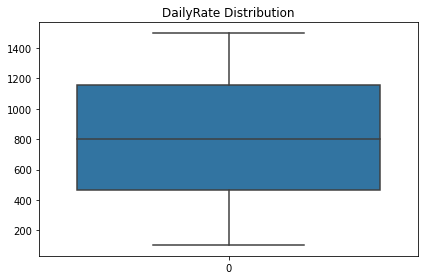

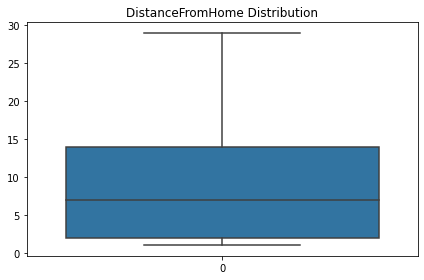

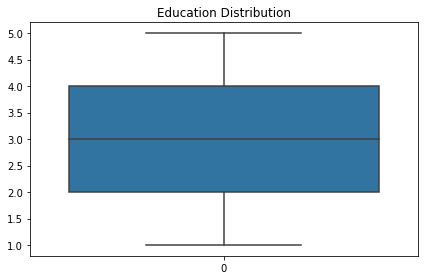

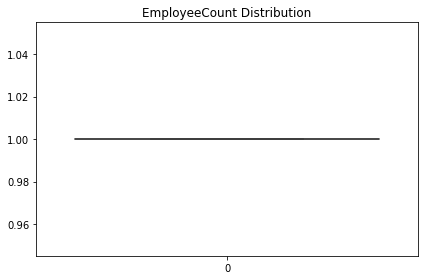

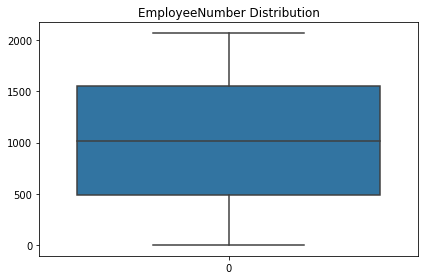

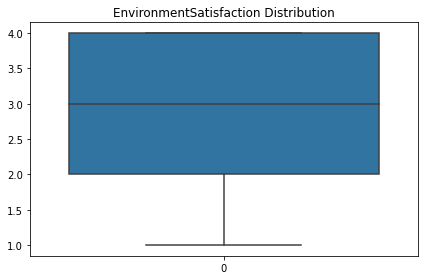

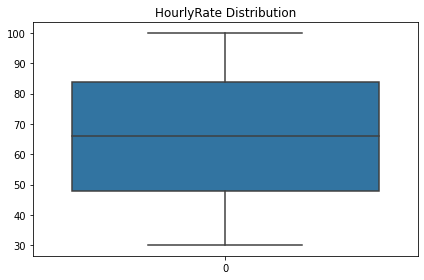

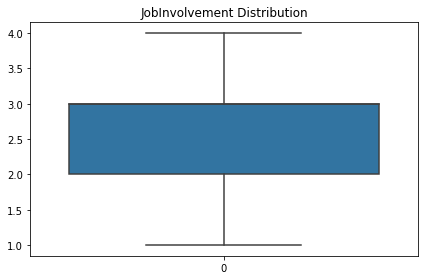

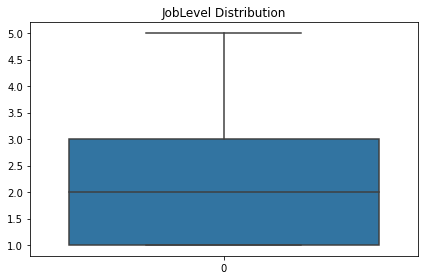

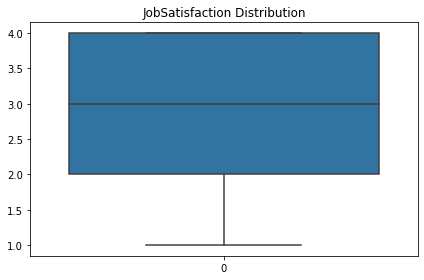

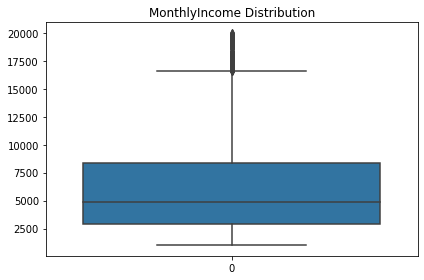

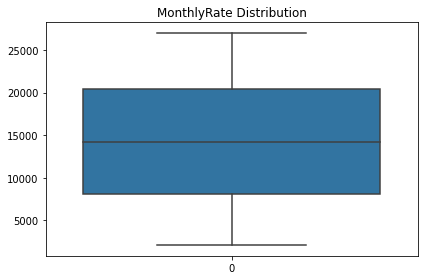

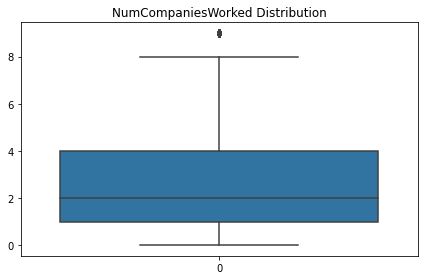

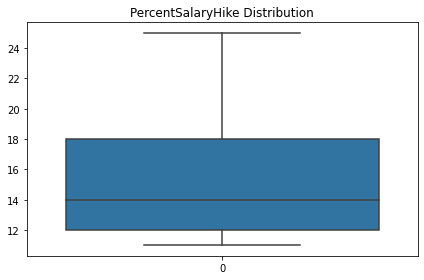

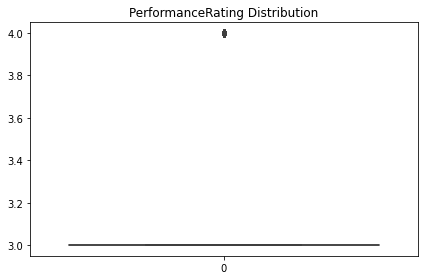

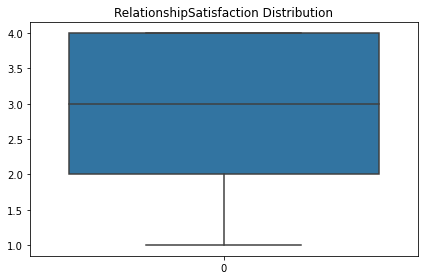

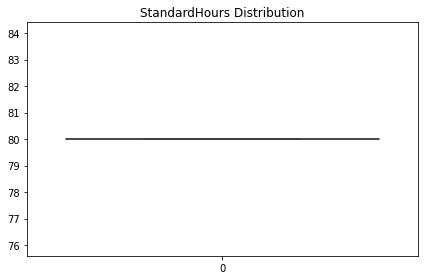

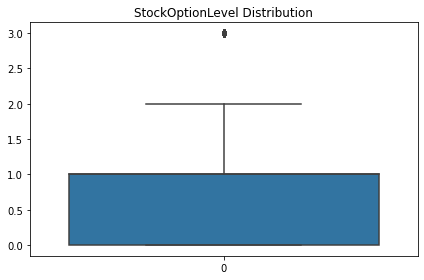

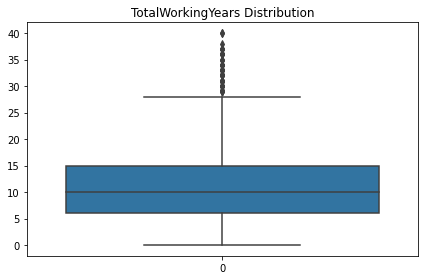

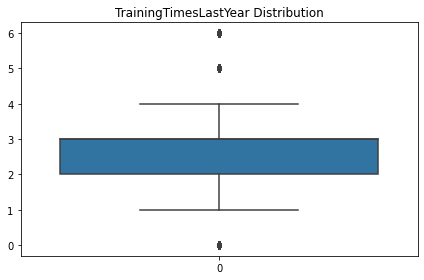

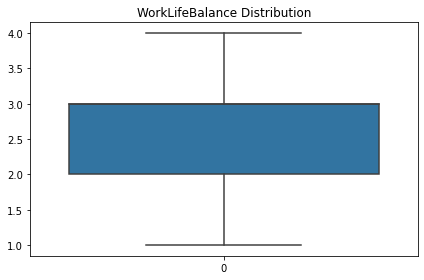

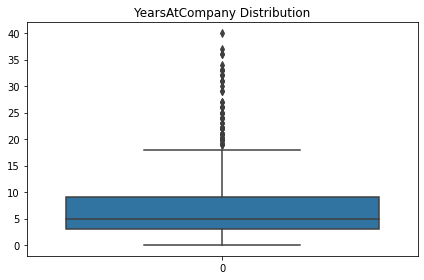

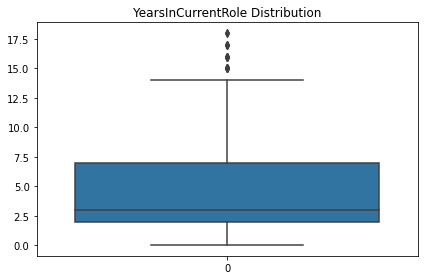

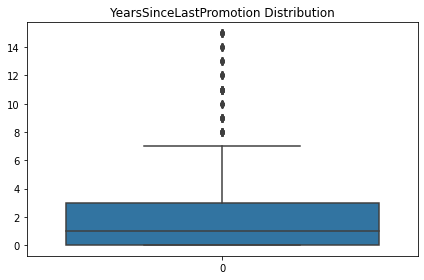

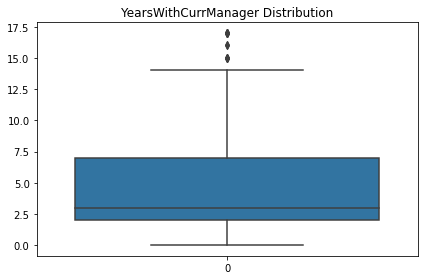

In [7]:
for col in numeric_cols :
  sns.boxplot(data = df[col])
  plt.title(col + ' Distribution')
  plt.tight_layout()
  plt.show()


In [ ]:
# 직원의 숫자는 모두 1로 동일하기 때문에 삭제해도 되는 변수일 것 같다
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [10]:
# 표준 시간은 모두 같으므로 삭제해도 되는 변수 같다
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [12]:
# 삭제해도 되지 않을 듯 하다 
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

Employee number은 직원 id이므로 삭제해도 될 것 같다

이상치 삭제해주기

Monthlyincome, numcompaniesWorked

In [13]:
#Monthlyincome
a = df[df['MonthlyIncome'] >= 15000].index
df.drop(a, inplace=True)

#NumCompaniesWorked
b = df[df['NumCompaniesWorked'] >= 8].index
df.drop(b, inplace=True)

### **2.유의미한 시각화 5개 이상**

시각화1: Arrition이 Yes인 경우와 No인 경우 나눠서 그리는 displot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

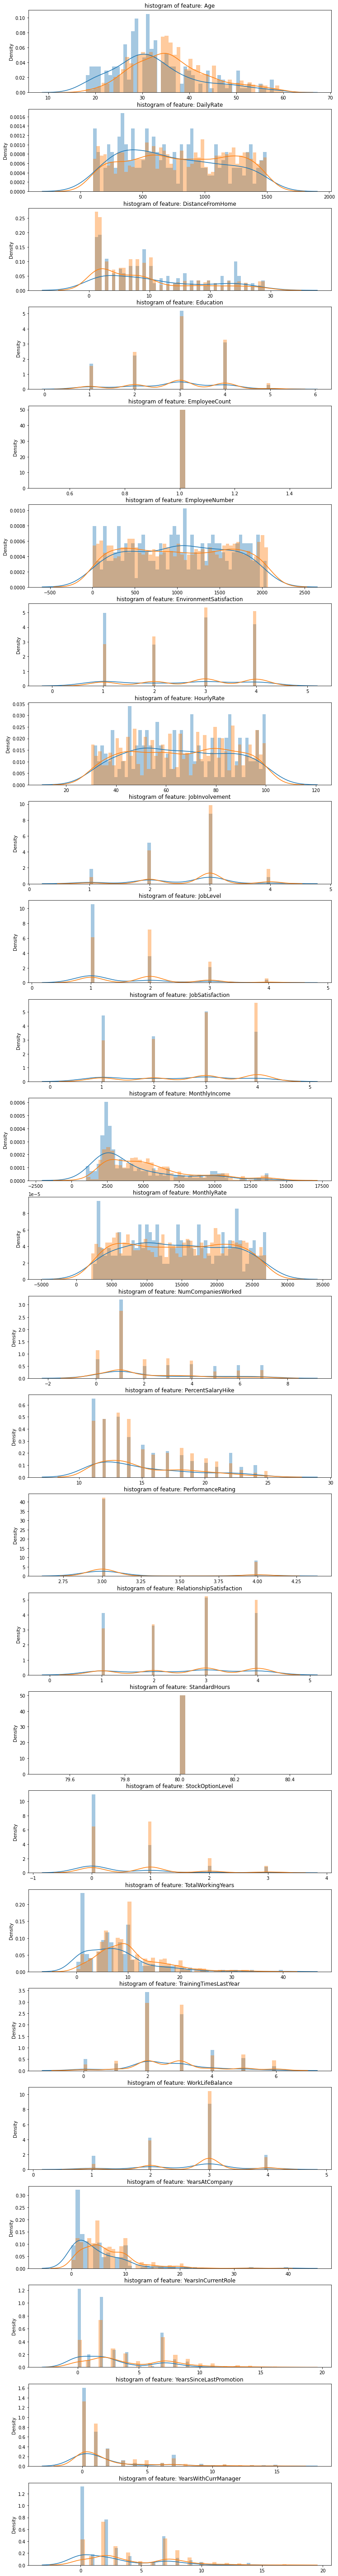

In [ ]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(df[numeric_cols]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Attrition == 'Yes'], bins=50)
    sns.distplot(df[cn][df.Attrition == 'No'], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [18]:
df['JobLevel'][df.Attrition == 'Yes'].describe()

count    214.000000
mean       1.537383
std        0.802581
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: JobLevel, dtype: float64

In [19]:
df['JobLevel'][df.Attrition == 'No'].describe()

count    1032.000000
mean        1.869186
std         0.809342
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: JobLevel, dtype: float64

Attriction이 Yes인 경우와 No인 경우의 분포가 비슷하게 나타난다

daily rate, distanceFromhome, education, employeecount,

시각화2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

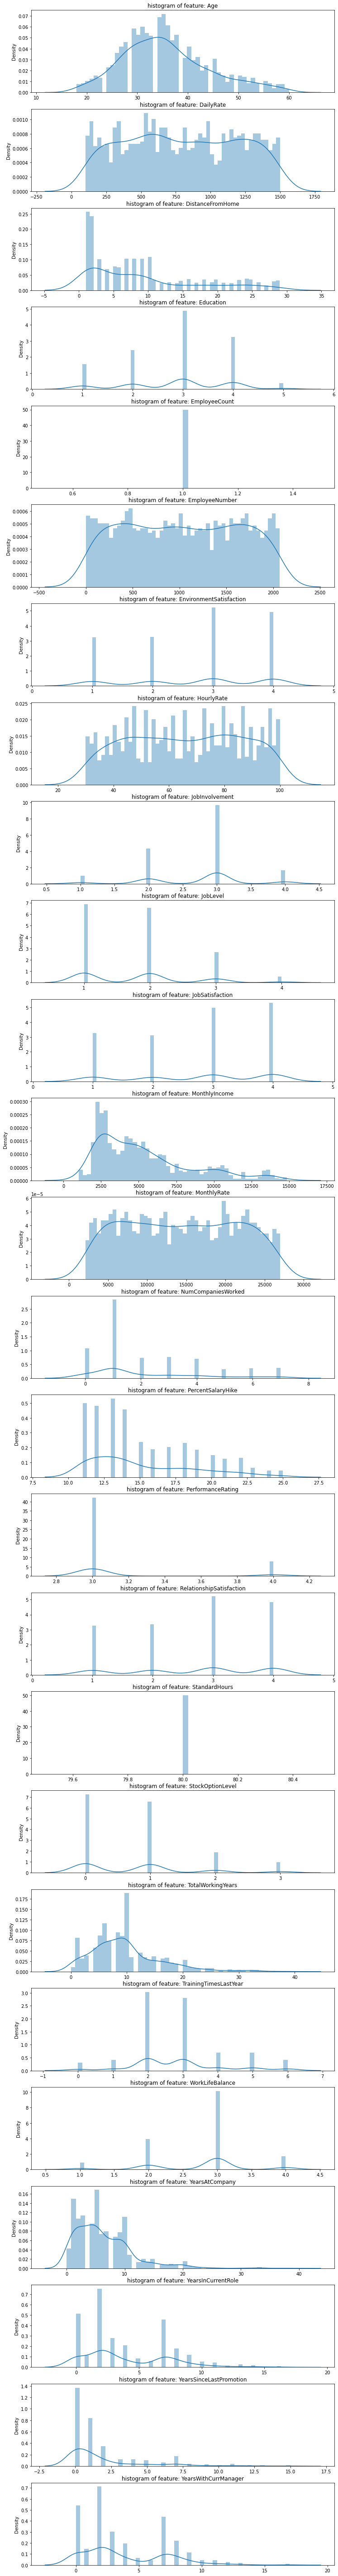

In [ ]:
plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(df[numeric_cols]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [21]:
for col in numeric_cols:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) 
         )

Age             Skewness: 00.55
DailyRate       Skewness: 00.02
DistanceFromHome Skewness: 00.92
Education       Skewness: -0.27
EmployeeCount   Skewness: 00.00
EmployeeNumber  Skewness: 00.01
EnvironmentSatisfaction Skewness: -0.31
HourlyRate      Skewness: -0.03
JobInvolvement  Skewness: -0.48
JobLevel        Skewness: 00.71
JobSatisfaction Skewness: -0.34
MonthlyIncome   Skewness: 01.08
MonthlyRate     Skewness: 00.02
NumCompaniesWorked Skewness: 01.00
PercentSalaryHike Skewness: 00.79
PerformanceRating Skewness: 01.90
RelationshipSatisfaction Skewness: -0.29
StandardHours   Skewness: 00.00
StockOptionLevel Skewness: 00.96
TotalWorkingYears Skewness: 01.24
TrainingTimesLastYear Skewness: 00.56
WorkLifeBalance Skewness: -0.55
YearsAtCompany  Skewness: 01.74
YearsInCurrentRole Skewness: 00.82
YearsSinceLastPromotion Skewness: 02.06
YearsWithCurrManager Skewness: 00.80


numeric 변수 들에 대해서 비대칭의 정도가 크지 않음을 알 수 있다

시각화3

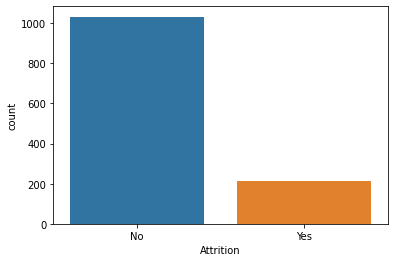

In [ ]:
sns.countplot(x='Attrition',data=df)

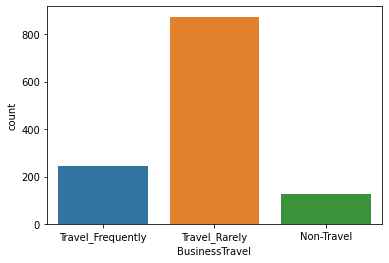

In [ ]:
sns.countplot(x='BusinessTravel',data=df)

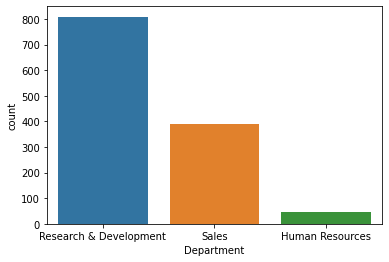

In [ ]:
sns.countplot(x='Department',data=df)

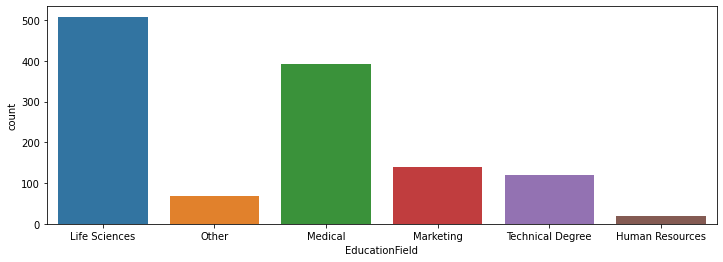

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='EducationField',data=df)

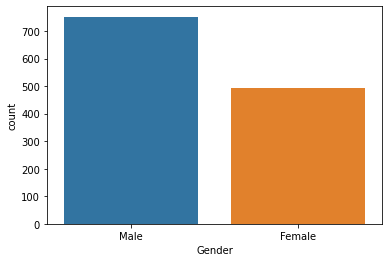

In [ ]:
sns.countplot(x='Gender',data=df)

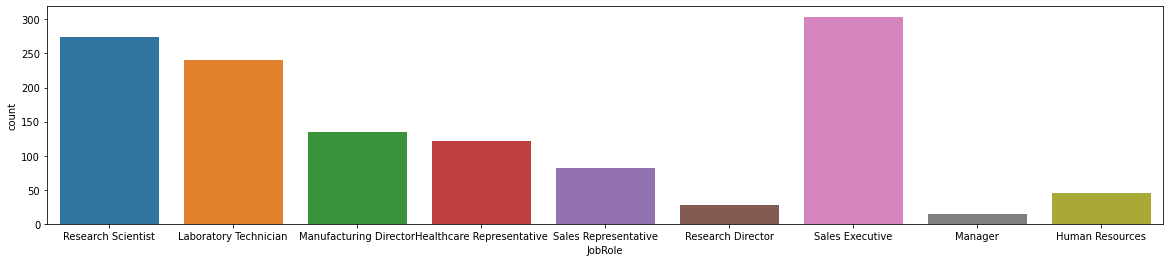

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='JobRole',data=df)

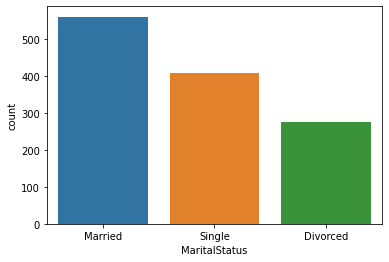

In [ ]:
sns.countplot(x='MaritalStatus',data=df)

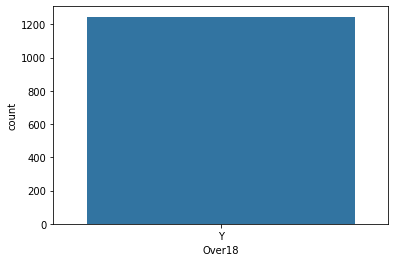

In [15]:
sns.countplot(x='Over18',data=df)

In [16]:
df['Over18'].value_counts()
#over18 값이 하나이기 때문에 삭제해준다

Y    1246
Name: Over18, dtype: int64

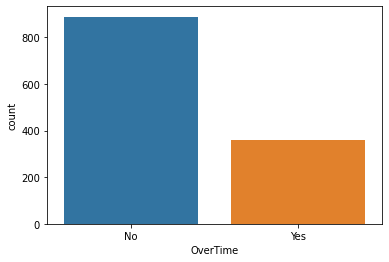

In [ ]:
sns.countplot(x='OverTime',data=df)

앞에서 말한 변수들 Over18, EmployeeCount, StandarHours, Employee number은 삭제해준다

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df = df.drop(['Over18','EmployeeCount',
       'EmployeeNumber','StandardHours'],axis=1)

In [27]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [28]:
numeric_col =['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
 'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

시각화4

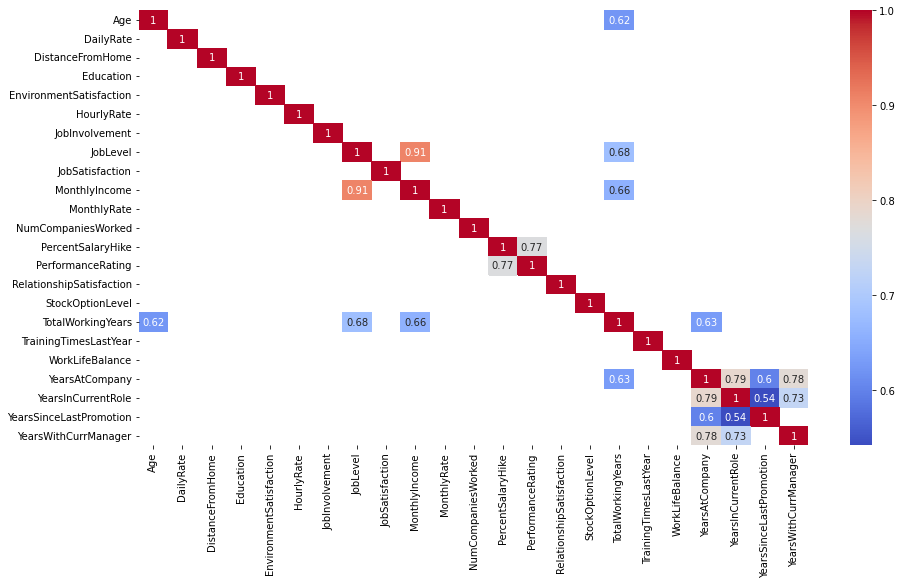

In [29]:
corr = df[numeric_col].corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr[corr>0.5], annot = True, cmap = 'coolwarm')
plt.show()

시각화5

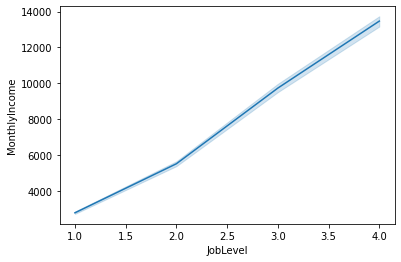

In [ ]:
sns.lineplot(x='JobLevel',y='MonthlyIncome',data=df)
# joblevel이 높을 수록 monthlyincome이 높아진다

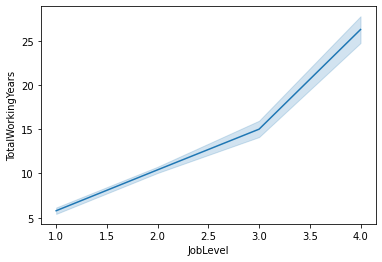

In [33]:
sns.lineplot(x='JobLevel',y='TotalWorkingYears',data=df)
# 업무의 수준이 높을 수록 경력 기간이 높아진다

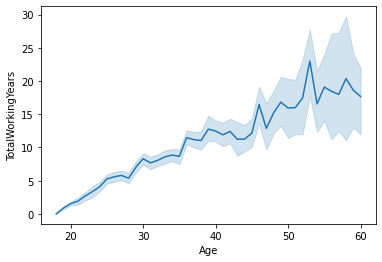

In [34]:
sns.lineplot(x='Age',y='TotalWorkingYears',data=df)
# 나이가 많은 수록 totalworking year가 높아진다

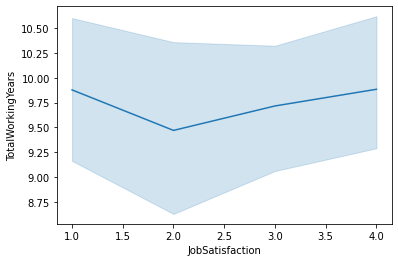

In [36]:
sns.lineplot(x='JobSatisfaction',y='TotalWorkingYears',data=df)
# 나이가 많은 수록 totalworking year가 높아진다

### **3. 수치형 변수 간 상관관계 파악**

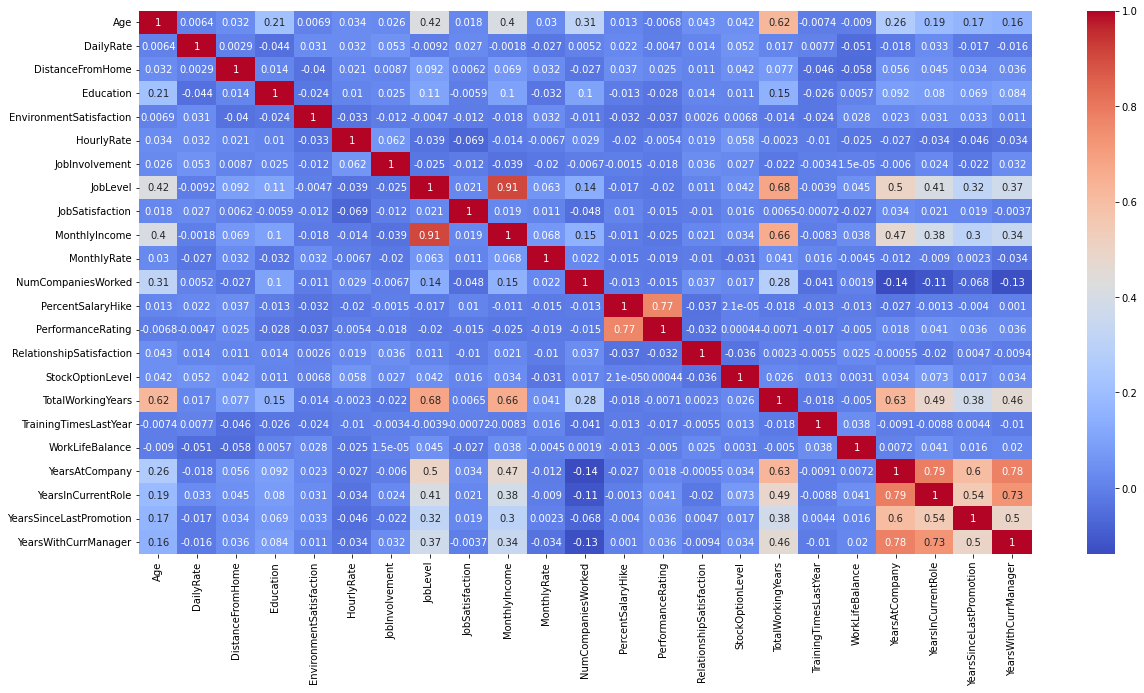

In [39]:
corr = df[numeric_col].corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

### **4.파생변수 생성**

경력 기간과 현재 역할의 년수가 같다는 것은 한 직장에서 계속 같은 역할을 하고 있다는 것을 의미한다

In [40]:
a = df[df['TotalWorkingYears'] == df['YearsInCurrentRole']].index

In [49]:
a

Int64Index([  23,   37,   51,   72,  108,  127,  160,  164,  179,  191,  201,
             212,  246,  292,  296,  301,  336,  343,  457,  555,  565,  615,
             662,  670,  685,  727,  763,  776,  796,  797,  815,  828,  831,
             842,  848,  853,  856,  873,  880,  892,  915,  929,  934,  938,
             972, 1039, 1136, 1149, 1153, 1174, 1178, 1197, 1206, 1249, 1311,
            1316, 1364, 1393, 1415, 1436],
           dtype='int64')

In [50]:
df['Samerole'] = 'No'

In [51]:
df.loc[a,'Samerole'] = 'Yes'

파트너의 유무

In [52]:
df["Partner"]=df["MaritalStatus"].replace({"Married":"Yes", "Divorced":"No", "Single":"No"})